In [2]:
#Author - Ashish Kumar Jayant
#Date - 29th March,2017
#Title - Kepler Dataset Problem


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


/home/user/stackRoute/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [199]:
kepler = pd.read_csv("Ex01_Kepler_Regression.csv")

In [200]:
kepler = kepler.drop("planet",axis = 1)

In [201]:
#kepler = (kepler - kepler.mean())/kepler.std()

In [221]:
kepler_y = kepler['OrbitalPeriod']

In [222]:
kepler_x = kepler.drop('OrbitalPeriod',axis = 1)

## Correlation 

In [8]:
corr = kepler.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

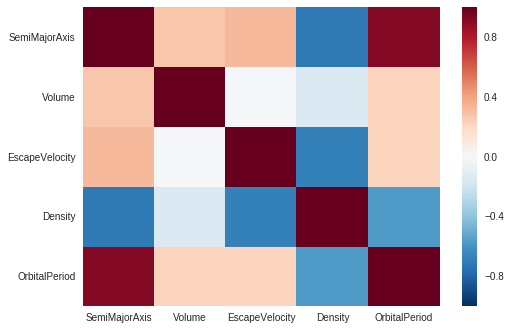

In [9]:
plt.show()

## Target vs features plots

In [211]:
l = list(kepler_x.columns)

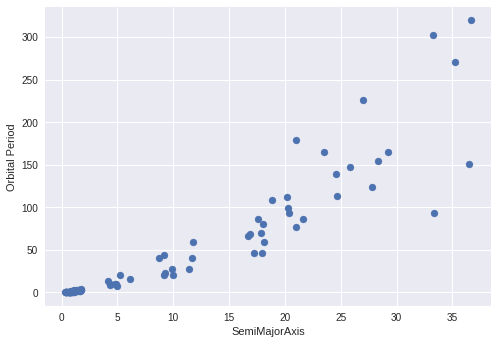

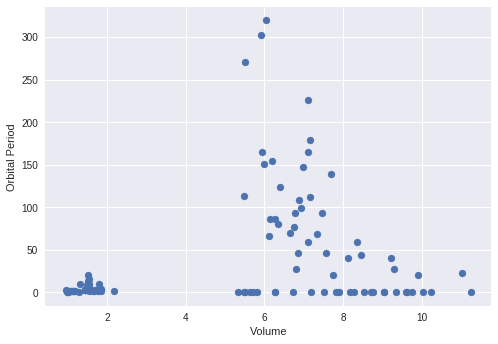

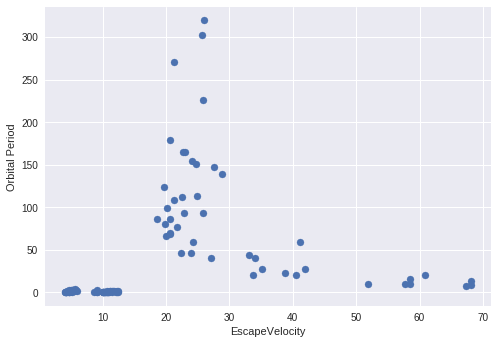

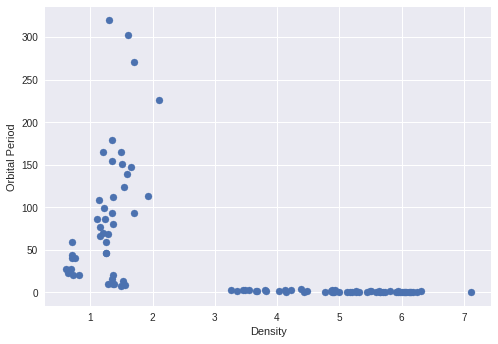

In [11]:
for i in range(len(l)):
    x = np.array(kepler_x[l[i]])
    plt.scatter(x,np.array(kepler_y))
    plt.xlabel(l[i])
    plt.ylabel("Orbital Period")
    plt.show()

## Target vs features plots with logaritmic transformation

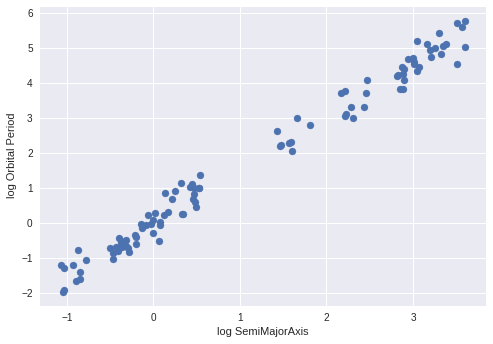

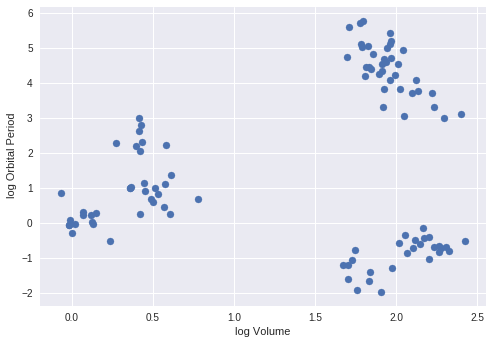

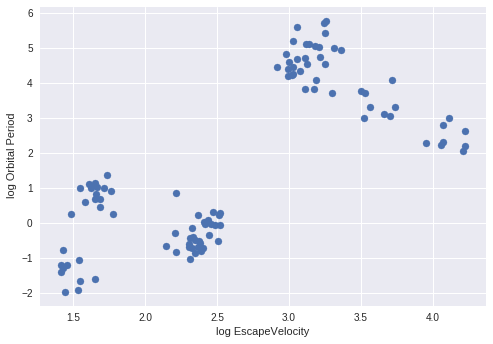

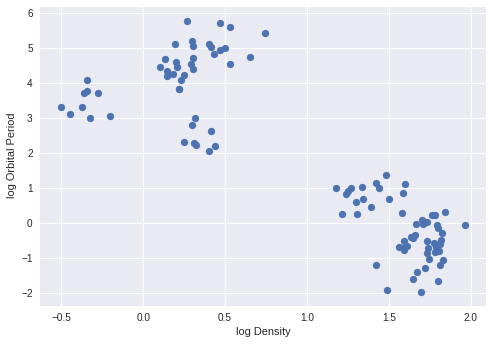

In [12]:
for i in range(len(l)):
    x = np.array(kepler_x[l[i]])
    plt.scatter(np.log(x),np.log(np.array(kepler_y)))
    st = "log " + l[i]
    plt.xlabel(st)
    plt.ylabel(" log Orbital Period")
    plt.show()

### Mathematical Transformation 

In [204]:
kepler_x_log = np.log(kepler_x)

In [205]:
kepler_y_log = np.log(kepler_y)

### Scaling by Z-scores

In [265]:
la = list(kepler_x.columns)

In [266]:
for i in range(len(la)):
    kepler_x_std[la[i]] = (kepler_x - kepler_x[la[i]].mean())/kepler_x[la[i]].std()
    kepler_x_log_std[la[i]] = (kepler_x_log - kepler_x_log[la[i]].mean())/kepler_x_log[la[i]].std()
    

In [241]:
kepler_y_std = (kepler_y - kepler_y.mean())/kepler_y.std()

In [267]:
kepler_y_log_std = (kepler_y_log - kepler_y_log.mean())/kepler_y_log.std()

In [268]:
train_x = np.array(kepler_x_std[:60])
train_y = np.array(kepler_y_std[:60])
test_x = np.array(kepler_x_std[61:99])
test_y = np.array(kepler_y_std[61:99])

In [269]:
train_x_log = np.array(kepler_x_log_std[:60])
train_y_log = np.array(kepler_y_log_std[:60])
test_x_log = np.array(kepler_x_log_std[61:99])
test_y_log = np.array(kepler_y_log_std[61:99])


## Chosing the alpha for Lasso &  fitting in Linear Regression using Lasso Regularization

In [270]:
alphas = np.linspace(0.001,1.25,10000)*0.5

In [271]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(train_x_log),train_y_log)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

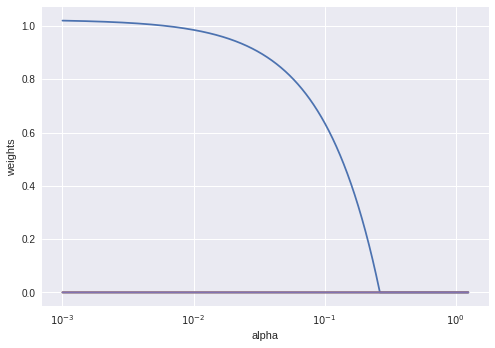

In [272]:
plt.show()

In [274]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(train_x_log,train_y_log)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(train_x_log,train_y_log)
mean_squared_error(test_y, np.exp(lasso.predict(test_x_log)))

2.3573771851734868

In [275]:
lassocv.alpha_

0.00013217801492328407

In [276]:
kepler_x.columns

Index(['SemiMajorAxis', 'Volume', 'EscapeVelocity', 'Density'], dtype='object')

In [277]:
lasso.coef_

array([  1.00296139e+00,   4.19326291e-16,   1.59835584e-18,
         0.00000000e+00])

In [278]:
predicted_period = lasso.predict(test_x_log)

In [279]:
predicted_period = np.exp(predicted_period)

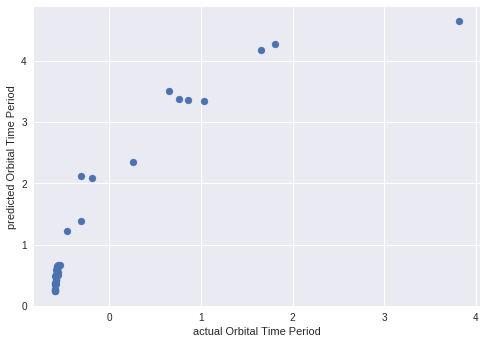

In [280]:
plt.scatter(test_y,(predicted_period))
plt.ylabel("predicted Orbital Time Period")
plt.xlabel("actual Orbital Time Period")
plt.show()

## Error Analysis

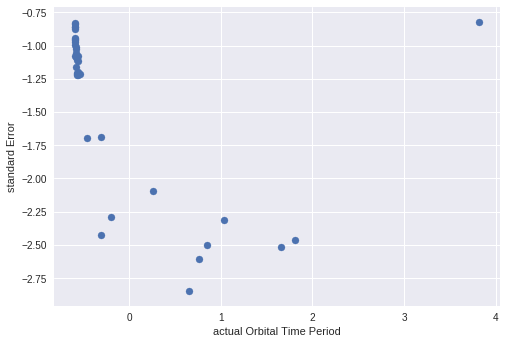

In [281]:
plt.scatter(test_y,test_y - predicted_period)
plt.ylabel("standard Error")
plt.xlabel("actual Orbital Time Period")
plt.show()

In [282]:
error_df = pd.DataFrame(test_y - predicted_period)

In [283]:
(test_y - predicted_period).mean()

-1.4057396835332157

### Error histogram

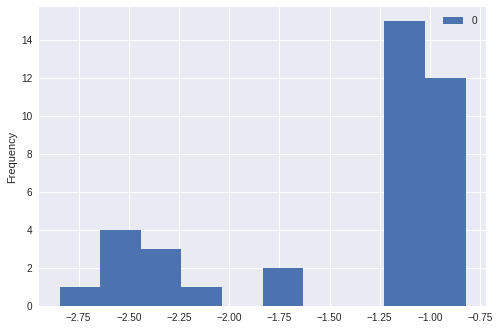

In [284]:
error_df.plot(kind ='hist')
plt.show()

## Rescaling to original

In [285]:
mean_period = kepler['OrbitalPeriod'].mean()
std_period = kepler['OrbitalPeriod'].std()

In [286]:
predicted_period_u = predicted_period*std_period + mean_period

In [287]:
error_u = predicted_period_u - kepler['OrbitalPeriod'][61:99] 

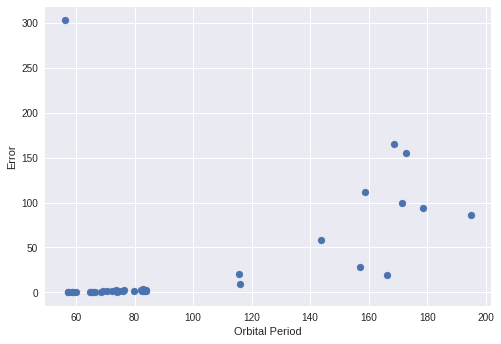

In [288]:
plt.scatter(np.array(error_u),np.array(kepler['OrbitalPeriod'][61:99]))
plt.ylabel("Error")
plt.xlabel("Orbital Period")
plt.show()